# Making Visualizations

Here we make visualizations to compare DMRG to TFIM in the 100-spin chain case

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [67]:
"""
load DMRG data
"""

length=100

name = f"DMRG_TFIM_length_{length}_data"

dmrg_xx_correlators = np.load(f"xx_correlators_{name}.npy")
dmrg_zz_correlators = np.load(f"zz_correlators_{name}.npy")

dmrg_x_expectations = np.load(f"x_expectations_{name}.npy")
dmrg_z_expectations = np.load(f"z_expectations_{name}.npy")

with open(f"s1_dict_{name}.json", "r") as s1_dict_file:
    modded_dmrg_s1_dict=json.loads(s1_dict_file.read())

with open(f"s2_dict_{name}.json", "r") as s2_dict_file:
    modded_dmrg_s2_dict=json.loads(s2_dict_file.read())

"""
fix keys
"""
dmrg_s1_dict = dict()
for k in modded_dmrg_s1_dict:
    comma_index = k.index(', ')
    orig_key = (int(k[1:comma_index]), int(k[comma_index+1:-1]))
    
    dmrg_s1_dict[orig_key] = modded_dmrg_s1_dict[k]

dmrg_s2_dict = dict()
for k in modded_dmrg_s2_dict:
    comma_index = k.index(', ')
    orig_key = (int(k[1:comma_index]), int(k[comma_index+1:-1]))
    
    dmrg_s2_dict[orig_key] = modded_dmrg_s2_dict[k]

In [32]:
"""
load Transformer data
"""

name = "length_100_tfim_seed_1"

xx_correlators = np.load(f"{name}_xx_correlators.npy", allow_pickle=True)
zz_correlators = np.load(f"{name}_zz_correlators.npy", allow_pickle=True)
xx_correlators25 = np.load(f"{name}_xx_correlators25.npy", allow_pickle=True)
zz_correlators25 = np.load(f"{name}_zz_correlators25.npy", allow_pickle=True)
x_expectations = np.load(f"{name}_x_expectations.npy", allow_pickle=True)
z_expectations = np.load(f"{name}_z_expectations.npy", allow_pickle=True)

second_renyis = np.load(f"{name}_second_renyis.npy")

FileNotFoundError: [Errno 2] No such file or directory: 'length_100_tfim_seed_1_z_expectations.npy'

In [38]:
np.sum(xx_correlators[1])

0.3284148

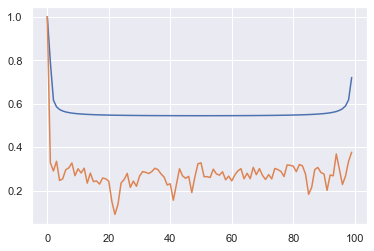

In [47]:
plt.plot(dmrg_xx_correlators[0, :])
plt.plot([np.sum(qq) for qq in xx_correlators])

In [54]:
dmrg_xx_correlators[0, 50]

0.5446283350896763

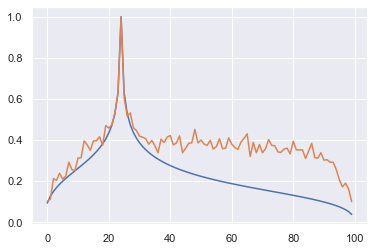

In [44]:
plt.plot(dmrg_zz_correlators[24, :])
plt.plot([np.sum(qq) for qq in zz_correlators25])

In [55]:
zz_correlators25

array([0.102, 0.112, 0.212, 0.204, 0.238, 0.21 , 0.224, 0.292, 0.256,
       0.252, 0.312, 0.314, 0.396, 0.376, 0.35 , 0.396, 0.396, 0.416,
       0.374, 0.47 , 0.458, 0.474, 0.534, 0.63 , 1.   , 0.606, 0.516,
       0.532, 0.46 , 0.446, 0.418, 0.414, 0.406, 0.38 , 0.398, 0.372,
       0.338, 0.404, 0.388, 0.414, 0.422, 0.376, 0.386, 0.42 , 0.338,
       0.36 , 0.384, 0.386, 0.452, 0.386, 0.4  , 0.38 , 0.374, 0.398,
       0.356, 0.368, 0.406, 0.358, 0.36 , 0.41 , 0.38 , 0.364, 0.354,
       0.39 , 0.408, 0.43 , 0.32 , 0.388, 0.338, 0.378, 0.338, 0.358,
       0.402, 0.374, 0.372, 0.342, 0.34 , 0.356, 0.36 , 0.332, 0.394,
       0.352, 0.352, 0.352, 0.31 , 0.346, 0.384, 0.314, 0.312, 0.338,
       0.302, 0.304, 0.292, 0.292, 0.256, 0.206, 0.172, 0.19 , 0.162,
       0.1  ])

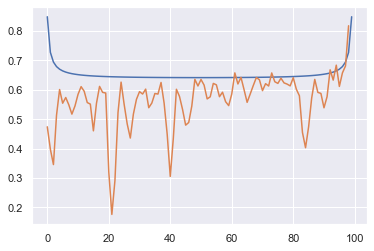

In [65]:
plt.plot(dmrg_z_expectations)
plt.plot([np.sum(qq) for qq in x_expectations])

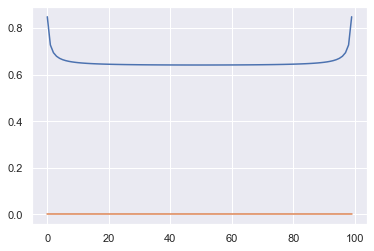

In [68]:
plt.plot(dmrg_x_expectations)
plt.plot(dmrg_z_expectations)

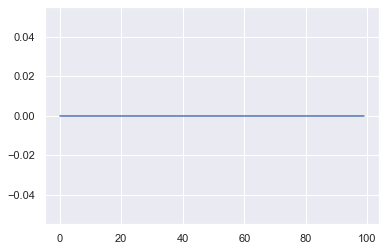

In [59]:
plt.plot(dmrg_x_expectations-dmrg_z_expectations)


In [61]:
np.max(dmrg_x_expectations-dmrg_z_expectations)

0.0

In [58]:
dmrg_x_expectations[40]

0.6418291136004087

# Comparison 1

Z and X expectations

In [9]:
dmrg_x_expectations= np.sin(np.linspace(0, np.pi, 100))+np.random.randn(100)
x_expectations = np.sin(np.linspace(0, np.pi, 100))

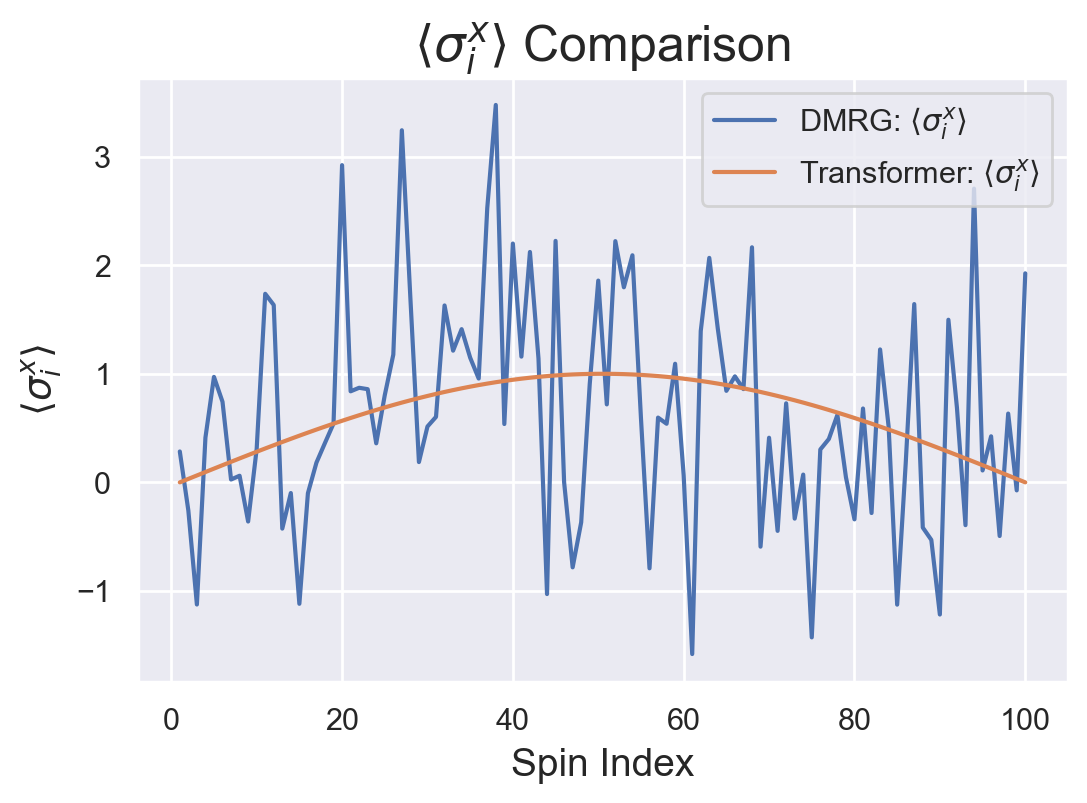

In [21]:
xs = np.arange(1, 101)

fig1, axis1 = plt.subplots(dpi=200)

axis1.plot(
    xs, 
    dmrg_x_expectations, 
    label=r"DMRG: $\langle \sigma_i^x \rangle$"
)

axis1.plot(
    xs, 
    x_expectations,
    label = r"Transformer: $\langle \sigma_i^x \rangle$"
)

"""
marker='x',
markersize=1,
"""

axis1.set_title(r"$\langle \sigma_i^x \rangle$ Comparison", fontsize=18)
axis1.set_ylabel(r"$\langle \sigma_i^x \rangle$", fontsize=14)
axis1.set_xlabel(r"Spin Index", fontsize=14)

plt.legend()

# Comparison 2

$\langle Z_1 Z_n\rangle$ and $\langle X_1 X_n\rangle$ correlators 

In [ ]:
xs = np.arange(1, 101)

fig1, axis1 = plt.subplots(dpi=200)

axis1.plot(
    xs, 
    dmrg_x_expectations, 
    label=r"DMRG: $\langle \sigma_1^x \sigma_i^x \rangle$"
)

axis1.plot(
    xs, 
    x_expectations,
    label = r"Transformer: $\langle \sigma_1^x \sigma_i^x \rangle$"
)

"""
marker='x',
markersize=1,
"""

axis1.set_title(r"$\langle \sigma_1^x \sigma_i^x \rangle$ Comparison", fontsize=18)
axis1.set_ylabel(r"$\langle \sigma_1^x \sigma_i^x \rangle$", fontsize=14)
axis1.set_xlabel(r"Spin Index", fontsize=14)

plt.legend()

# Comparison 3

$\langle Z_{25} Z_n\rangle$ and $\langle X_{25} X_n\rangle$ correlators 

# Comparison 4

$S_2$ comparison

In [ ]:
xs = range(1, decoder.sequence_length-1)

dmrg_s2_list = [dmrg_s2_dict[(0, idx)] for idx in xs]

fig1, axis1 = plt.subplots(dpi=200)

axis1.plot(
    xs, 
    dmrg_s2_list, 
    label=r"DMRG Bipartite $S_2$"
)

axis1.plot(
    xs, 
    second_renyis,
    label = r"Transformer Bipartite $S_2$"
)

"""
marker='x',
markersize=1,
"""

axis1.set_title(r"2-Renyi Entanglement Entropy Comparison", fontsize=18)
axis1.set_ylabel(r"$S_2$", fontsize=14)
axis1.set_xlabel(r"Bipartite Region Boundary", fontsize=14)

plt.legend()